In [5]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Reading all the Data

In [6]:
with open("/content/drive/MyDrive/Image-Segementation/Image-Segementation-Dataset/segmentation.names") as data_description:
    print(data_description.read())

1. Title: Image Segmentation data

2. Source Information
   -- Creators: Vision Group, University of Massachusetts
   -- Donor: Vision Group (Carla Brodley, brodley@cs.umass.edu)
   -- Date: November, 1990
 
3. Past Usage: None yet published

4. Relevant Information:

   The instances were drawn randomly from a database of 7 outdoor 
   images.  The images were handsegmented to create a classification
   for every pixel.  

   Each instance is a 3x3 region.

5. Number of Instances: Training data: 210  Test data: 2100

6. Number of Attributes: 19 continuous attributes

7. Attribute Information:

    1.  region-centroid-col:  the column of the center pixel of the region.
    2.  region-centroid-row:  the row of the center pixel of the region.
    3.  region-pixel-count:  the number of pixels in a region = 9.
    4.  short-line-density-5:  the results of a line extractoin algorithm that 
         counts how many lines of length 5 (any orientation) with
         low contrast, less than or 

In [7]:
train = pd.read_csv('/content/drive/MyDrive/Image-Segementation/Image-Segementation-Dataset/segmentation.data')
train #All data is of float64 type

,TARGET-CLASS,REGION-CENTROID-COL,REGION-CENTROID-ROW,REGION-PIXEL-COUNT,SHORT-LINE-DENSITY-5,SHORT-LINE-DENSITY-2,VEDGE-MEAN,VEDGE-SD,HEDGE-MEAN,HEDGE-SD,INTENSITY-MEAN,RAWRED-MEAN,RAWBLUE-MEAN,RAWGREEN-MEAN,EXRED-MEAN,EXBLUE-MEAN,EXGREEN-MEAN,VALUE-MEAN,SATURATION-MEAN,HUE-MEAN
0,BRICKFACE,140.0,125.0,9,0.000000,0.0,0.277778,0.062963,0.666667,0.311111,6.185185,7.333334,7.666666,3.555556,3.444444,4.444445,-7.888889,7.777778,0.545635,-1.121818
1,BRICKFACE,188.0,133.0,9,0.000000,0.0,0.333333,0.266667,0.500000,0.077778,6.666666,8.333334,7.777778,3.888889,5.000000,3.333333,-8.333333,8.444445,0.538580,-0.924817
2,BRICKFACE,105.0,139.0,9,0.000000,0.0,0.277778,0.107407,0.833333,0.522222,6.111111,7.555555,7.222222,3.555556,4.333334,3.333333,-7.666666,7.555555,0.532628,-0.965946
3,BRICKFACE,34.0,137.0,9,0.000000,0.0,0.500000,0.166667,1.111111,0.474074,5.851852,7.777778,6.444445,3.333333,5.777778,1.777778,-7.555555,7.777778,0.573633,-0.744272
4,BRICKFACE,39.0,111.0,9,0.000000,0.0,0.722222,0.374074,0.888889,0.429629,6.037037,7.000000,7.666666,3.444444,2.888889,4.888889,-7.777778,7.888889,0.562919,-1.175773
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,GRASS,36.0,243.0,9,0.111111,0.0,1.888889,1.851851,2.000000,0.711110,13.333333,9.888889,12.111111,18.000000,-10.333333,-3.666667,14.000000,18.000000,0.452229,2.368311
206,GRASS,186.0,218.0,9,0.000000,0.0,1.166667,0.744444,1.166667,0.655555,13.703704,10.666667,12.666667,17.777779,-9.111111,-3.111111,12.222222,17.777779,0.401347,2.382684
207,GRASS,197.0,236.0,9,0.000000,0.0,2.444444,6.829628,3.333333,7.599998,16.074074,13.111111,16.666668,18.444445,-8.888889,1.777778,7.111111,18.555555,0.292729,2.789800
208,GRASS,208.0,240.0,9,0.111111,0.0,1.055556,0.862963,2.444444,5.007407,14.148149,10.888889,13.000000,18.555555,-9.777778,-3.444444,13.222222,18.555555,0.421621,2.392487


In [9]:
test = pd.read_csv('/content/drive/MyDrive/Image-Segementation/Image-Segementation-Dataset/segmentation.test')
test #All data is of floeat64 type

,TARGET-CLASS,REGION-CENTROID-COL,REGION-CENTROID-ROW,REGION-PIXEL-COUNT,SHORT-LINE-DENSITY-5,SHORT-LINE-DENSITY-2,VEDGE-MEAN,VEDGE-SD,HEDGE-MEAN,HEDGE-SD,INTENSITY-MEAN,RAWRED-MEAN,RAWBLUE-MEAN,RAWGREEN-MEAN,EXRED-MEAN,EXBLUE-MEAN,EXGREEN-MEAN,VALUE-MEAN,SATURATION-MEAN,HUE-MEAN
0,GRASS,110.0,189.0,9,0.000000,0.0,1.000000,0.666667,1.222222,1.186342,12.925926,10.888889,9.222222,18.666668,-6.111111,-11.111111,17.222221,18.666668,0.508139,1.910864
1,GRASS,86.0,187.0,9,0.000000,0.0,1.111111,0.720082,1.444444,0.750309,13.740741,11.666667,10.333334,19.222221,-6.222222,-10.222222,16.444445,19.222221,0.463329,1.941465
2,GRASS,225.0,244.0,9,0.000000,0.0,3.388889,2.195113,3.000000,1.520234,12.259259,10.333334,9.333334,17.111110,-5.777778,-8.777778,14.555555,17.111110,0.480149,1.987902
3,GRASS,47.0,232.0,9,0.000000,0.0,1.277778,1.254621,1.000000,0.894427,12.703704,11.000000,9.000000,18.111110,-5.111111,-11.111111,16.222221,18.111110,0.500966,1.875362
4,GRASS,97.0,186.0,9,0.000000,0.0,1.166667,0.691215,1.166667,1.005540,15.592592,13.888889,11.777778,21.111110,-5.111111,-11.444445,16.555555,21.111110,0.442661,1.863654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,CEMENT,32.0,158.0,9,0.000000,0.0,0.944445,0.862963,0.833333,0.611111,7.962963,6.333334,11.888889,5.666666,-4.888889,11.777778,-6.888889,11.888889,0.520578,-1.982834
2096,CEMENT,8.0,162.0,9,0.111111,0.0,1.611111,2.062962,0.333333,0.133333,8.370370,6.666666,12.000000,6.444445,-5.111111,10.888889,-5.777778,12.000000,0.484805,-2.044946
2097,CEMENT,128.0,161.0,9,0.000000,0.0,0.555555,0.251852,0.777778,0.162963,7.148148,5.555555,10.888889,5.000000,-4.777778,11.222222,-6.444445,10.888889,0.540918,-1.996307
2098,CEMENT,150.0,158.0,9,0.000000,0.0,2.166667,1.633334,1.388889,0.418518,8.444445,7.000000,12.222222,6.111111,-4.333334,11.333333,-7.000000,12.222222,0.503086,-1.943449


In [10]:
test['TARGET-CLASS'].replace({'BRICKFACE':1, 'SKY':2, 'FOLIAGE':3, 'CEMENT':4, 'WINDOW':5, 'PATH':6, 'GRASS':7}, inplace = True )
train['TARGET-CLASS'].replace({'BRICKFACE':1, 'SKY':2, 'FOLIAGE':3, 'CEMENT':4, 'WINDOW':5, 'PATH':6, 'GRASS':7}, inplace = True )
#Brickface = 1
#Sky = 2
#Foliage = 3
#Cement = 4
#Window = 5
#Path = 6
#Grass = 7

## Spliting training and testing data

In [12]:
X_test = test.iloc[1:, 2:]
print(X_test.shape)
y_test = test.iloc[1:,:1]
X_train = train.iloc[1:, 2:]
y_train = train.iloc[1:,:1]

(2099, 18)


### Applying Support Vector Classifier

In [13]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

0.7179609337779895


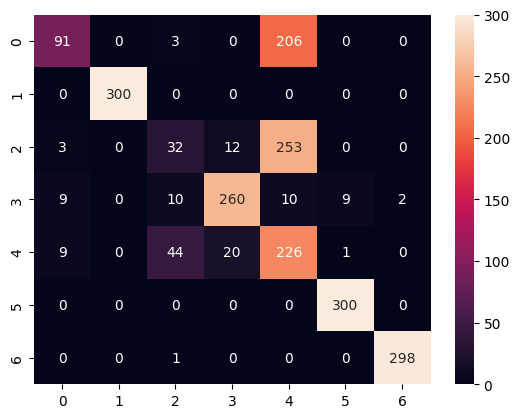

In [14]:
import sklearn as sk
from sklearn.metrics import confusion_matrix

model_predict = model.predict(X_test)
acc = sk.metrics.accuracy_score(y_test, model_predict)
print(acc) # Printing accuracy
# Confusion Matrics
conf_matrix = confusion_matrix(y_test, model_predict)
sns.heatmap(conf_matrix, annot=True, fmt='d');


### Applying Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression

model2 = LogisticRegression()
model2.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

0.9056693663649357


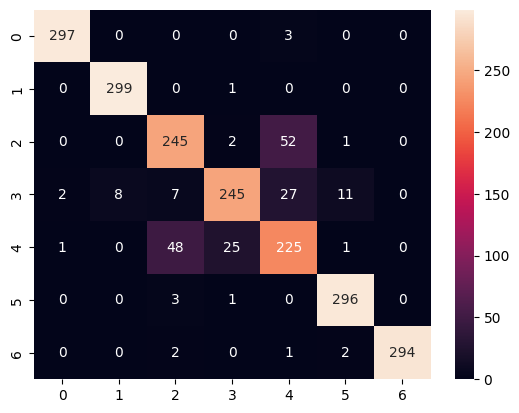

In [16]:
model2_predict = model2.predict(X_test)
acc2 = sk.metrics.accuracy_score(y_test, model2_predict)
print(acc2)
conf_matrix = confusion_matrix(y_test, model2_predict)
sns.heatmap(conf_matrix, annot=True, fmt='d');

### Applying K-Nearest Neighbour

In [17]:
from sklearn.neighbors import KNeighborsClassifier

model3 = KNeighborsClassifier(n_neighbors=7)
model3.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=7)

0.8937589328251548


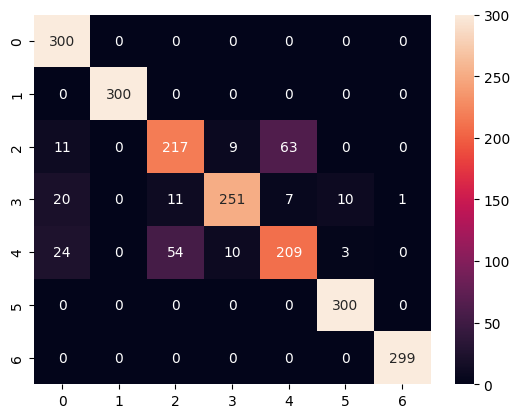

In [18]:
model3_predict = model3.predict(X_test)
acc3 = sk.metrics.accuracy_score(y_test, model3_predict)
print(acc3)
conf_matrix = confusion_matrix(y_test, model3_predict)
sns.heatmap(conf_matrix, annot=True, fmt='d');

### Applying Random Forest Classifier

In [19]:
from sklearn.ensemble import RandomForestClassifier

model4 = RandomForestClassifier(n_estimators=7)
model4.fit(X_train, y_train)

<ipython-input-19-0cef9be7b3ad>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model4.fit(X_train, y_train)


RandomForestClassifier(n_estimators=7)

0.9299666507860886


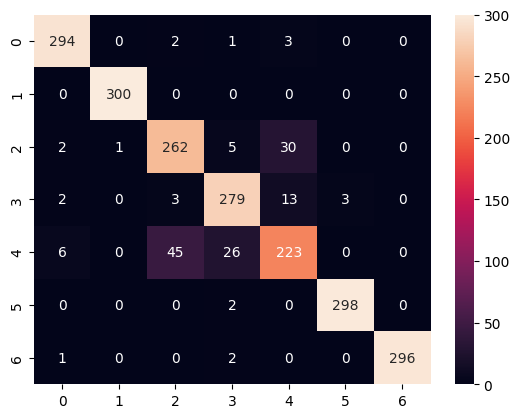

In [20]:
model4_predict = model4.predict(X_test)
acc4 = sk.metrics.accuracy_score(y_test, model4_predict)
print(acc4)
conf_matrix = confusion_matrix(y_test, model4_predict)
sns.heatmap(conf_matrix, annot=True, fmt='d');

### Applying Adaboost Classifier

In [21]:
from sklearn.ensemble import AdaBoostClassifier

model5 = AdaBoostClassifier(n_estimators=7)
model5.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier(n_estimators=7)

0.4263935207241544


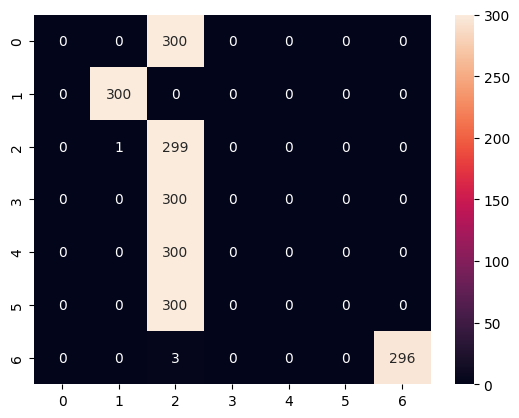

In [22]:
model5_predict = model5.predict(X_test)
acc5 = sk.metrics.accuracy_score(y_test, model5_predict)
print(acc5)
conf_matrix = confusion_matrix(y_test, model5_predict)
sns.heatmap(conf_matrix, annot=True, fmt='d');

### Applying Naive Bayes Classifier

In [23]:
from sklearn.naive_bayes import GaussianNB
model6 = GaussianNB()
model6.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

0.7951405431157694


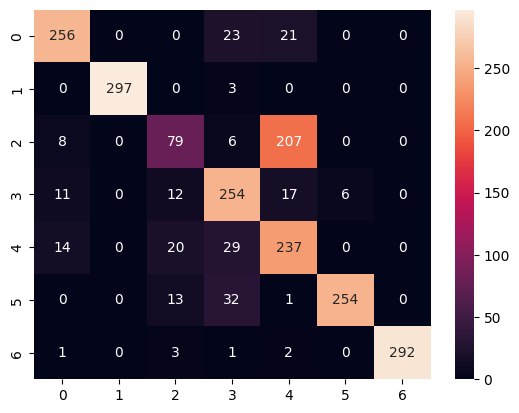

In [24]:
model6_predict = model6.predict(X_test)
acc6 = sk.metrics.accuracy_score(y_test, model6_predict)
print(acc6)
conf_matrix = confusion_matrix(y_test, model6_predict)
sns.heatmap(conf_matrix, annot=True, fmt='d');

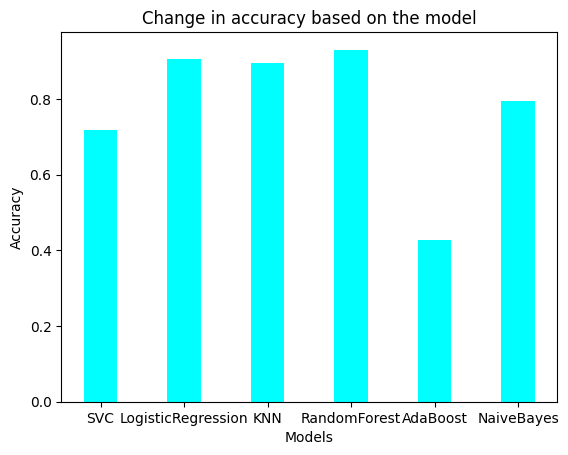

In [25]:
import matplotlib.pyplot as plt
data = {'SVC':acc, 'LogisticRegression':acc2, 'KNN':acc3, 'RandomForest':acc4, 'AdaBoost':acc5, 'NaiveBayes':acc6}
courses = list(data.keys())
values = list(data.values())
fig = plt.figure()
plt.bar(courses, values, color ='cyan',width = 0.4)
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Change in accuracy based on the model")
plt.show()

In [27]:
pickle.dump(model4, open('/content/drive/MyDrive/Image-Segementation/Image-Segementation-Dataset/model.pkl', 'wb'))